In [95]:
import pydna

In [96]:
from pydna.dseqrecord import Dseqrecord
a = Dseqrecord("CTTAAGatgccctaaccccGAATTC")
b = Dseqrecord("GAATTCatgccctaaccccGAATTC")
c = Dseqrecord("GAATTCatgcccgggggggggggccCTTAAG")


print(a.figure())
print(b.figure())
print(c.figure()) 

Dseqrecord(-25)
CTTAAGatgccctaaccccGAATTC
GAATTCtacgggattggggCTTAAG
Dseqrecord(-25)
GAATTCatgccctaaccccGAATTC
CTTAAGtacgggattggggCTTAAG
Dseqrecord(-31)
GAATTCatgcccgggggggggggccCTTAAG
CTTAAGtacgggcccccccccccggGAATTC


In [97]:
from Bio.Restriction import BamHI, EcoRI, BsmBI # BamHI cuts GGATCC
a1,a2  = a.cut(EcoRI)
b1,b2,b3 = b.cut(EcoRI)
c1,c2 = c.cut(EcoRI)

print(a1.figure())
print()
print(b2.figure())
print()
print(c2.figure())

Dseqrecord(-24)
CTTAAGatgccctaaccccG    
GAATTCtacgggattggggCTTAA

Dseqrecord(-23)
AATTCatgccctaaccccG    
    GtacgggattggggCTTAA

Dseqrecord(-30)
AATTCatgcccgggggggggggccCTTAAG
    GtacgggcccccccccccggGAATTC


In [98]:
d = a1+b2+c2
e = a1+c2
print(d.figure())
print(e.figure())

Dseqrecord(-69)
CTTAAGatgccctaaccccGAATTCatgccctaaccccGAATTCatgcccgggggggggggccCTTAAG
GAATTCtacgggattggggCTTAAGtacgggattggggCTTAAGtacgggcccccccccccggGAATTC
Dseqrecord(-50)
CTTAAGatgccctaaccccGAATTCatgcccgggggggggggccCTTAAG
GAATTCtacgggattggggCTTAAGtacgggcccccccccccggGAATTC


In [127]:
import networkx as nx
import matplotlib.pyplot as plt
G = nx.DiGraph()

In [131]:
G.add_node('S1')
G.add_node('S2')
G.add_node('S3')

G.add_edges_from([('S1', 'S2'), ('S2','S3'),('S1','S3')])
# G.add_weighted_edges_from([('S1', 'S3',5)])

In [133]:
import io

def to_graphviz(g):
    with io.StringIO() as F:
        print("""digraph{
            node[shape = "circle", style = "filled"];
            """, file = F)
        for u in g:
            for v in g[u]:
                if g[u][v] is not {}:
                    print(f'{u} -> {v}[label = ""];', file = F)
                    # print(f"{u} -> {v};", file = F)
                else:
                    print(f'{u} -> {v}[label = "{g[u][v]}"];', file = F)
        print("}", file = F)
        return F.getvalue()
        
# pprint.pprint(g)

print(to_graphviz(G))

digraph{
            node[shape = "circle", style = "filled"];
            
S1 -> S2[label = ""];
S1 -> S3[label = ""];
S2 -> S3[label = ""];
S3 -> S1[label = ""];
}



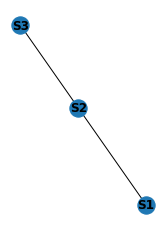

In [107]:
subax1 = plt.subplot(121)
nx.draw(G, with_labels=True, font_weight='bold')
# subax2 = plt.subplot(122)
# nx.draw_shell(G, nlist=[range(5, 10), range(5)], with_labels=True, font_weight='bold')